In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

<Axes: >

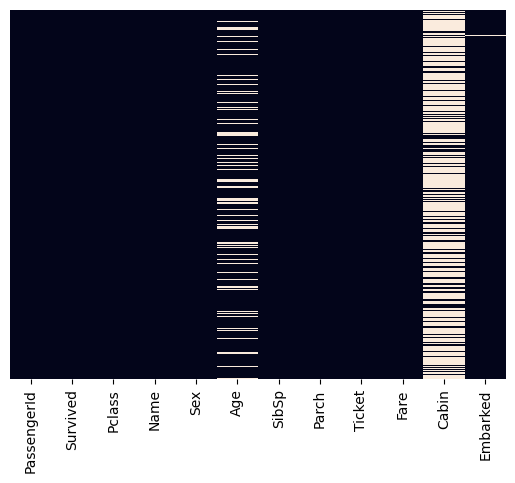

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)
# for count the null elements from the train dataset

<Axes: xlabel='Survived', ylabel='count'>

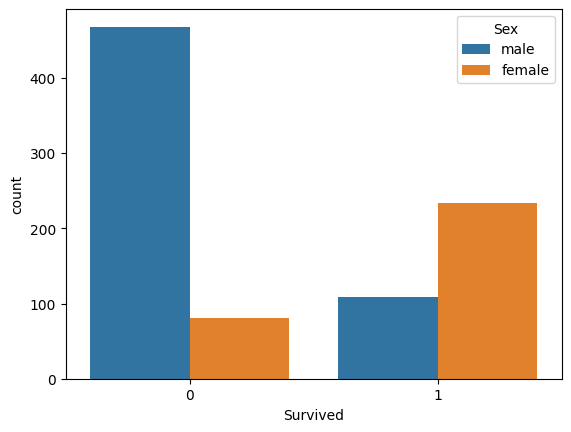

In [4]:
sns.countplot(x='Survived', hue='Sex', data=train)

/var/folders/y8/ddn6r265365glmvz8ckl9shc0000gn/T/ipykernel_11996/714023520.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=30)


<Axes: xlabel='Age'>

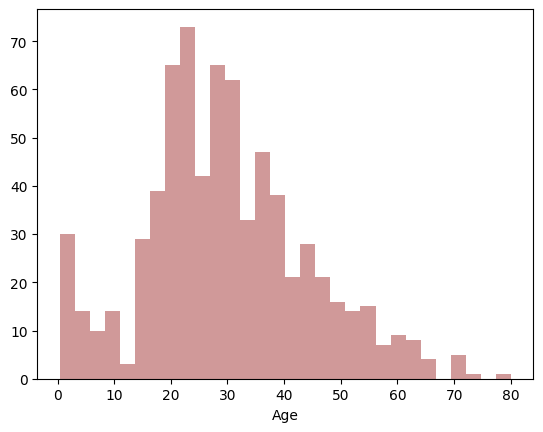

In [5]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=30)

<Axes: >

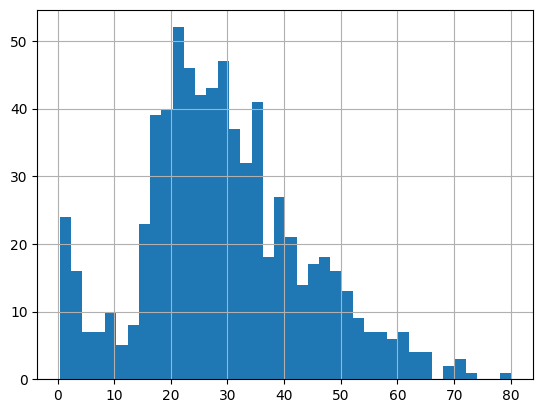

In [6]:
train['Age'].hist(bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

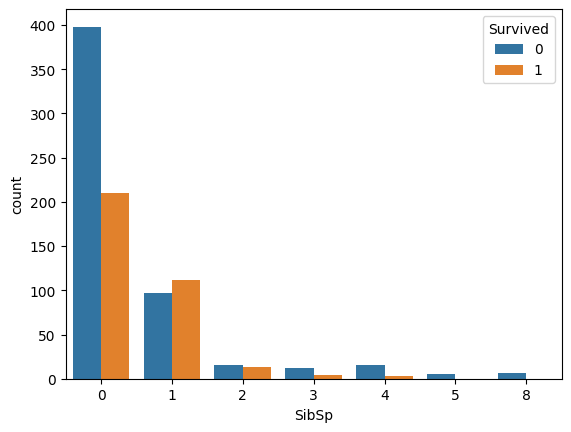

In [9]:
sns.countplot(x='SibSp', hue="Survived", data=train)

<Axes: xlabel='Pclass', ylabel='Age'>

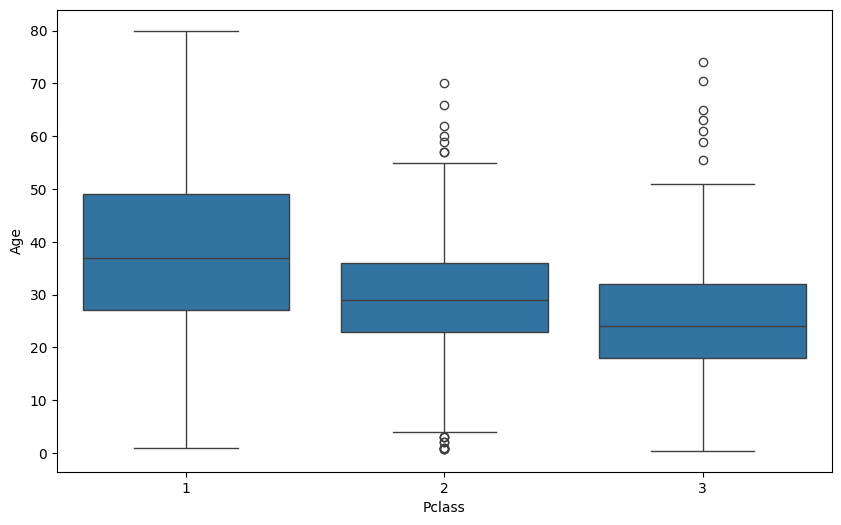

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
# return a value if that element is Nah.
# return a std value based on each Pclass

In [13]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

/var/folders/y8/ddn6r265365glmvz8ckl9shc0000gn/T/ipykernel_11996/3458154033.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
/var/folders/y8/ddn6r265365glmvz8ckl9shc0000gn/T/ipykernel_11996/3458154033.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

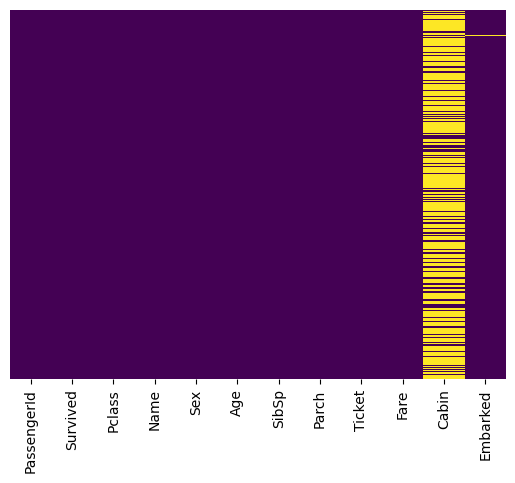

In [14]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
train.drop('Cabin', axis=1, inplace=True)

In [17]:
train.dropna(inplace=True)

In [18]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [19]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [20]:
train = pd.concat([train, sex, embark], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3, random_state=101)

In [22]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
predictions = logmodel.predict(x_test)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267

